# Flights Analysis in US

## by (Medhat Hamdy Zaki)

## Investigation Overview

In this investigation, I want to dive deeper into flight performance data to understand the factors causing flight delays as well as present carrier performance in terms of cancellations and delays.

## Dataset Overview

The dataset is from Bureau of Transportation Statistics.The data consisted attributes of approximately 16,984,354 record. It contains information about delays and cancellations for different carriers and destinations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_2006=pd.read_csv('2006.csv')
df_2007=pd.read_csv('2007.csv')
df_2008=pd.read_csv('2008.csv')

In [3]:
df=df_2006.append([df_2007,df_2008])

### What is the structure of your dataset?

There are 16,984,354 record in the dataset with 29 features Most variables are numeric in nature

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(5)

(16984354, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# descriptive ststistics for numeric variables
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.698435e+07,1.698435e+07,1.698435e+07,1.698435e+07,1.663723e+07,1.698435e+07,1.659821e+07,1.698435e+07,1.698435e+07,1.659821e+07,...,1.698435e+07,1.691426e+07,1.691991e+07,1.698435e+07,1.698435e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07
mean,2.006720e+03,5.970939e+00,1.571915e+01,3.937186e+00,1.339827e+03,1.331206e+03,1.484658e+03,1.495739e+03,2.191166e+03,1.265325e+02,...,7.241441e+02,6.868338e+00,1.611894e+01,2.043787e-02,2.297350e-03,4.102358e+00,8.110254e-01,4.167233e+00,2.933598e-02,5.435765e+00
std,6.948869e-01,3.496356e+00,8.779192e+00,1.990502e+00,4.785037e+02,4.639545e+02,5.046566e+02,4.807802e+02,1.976456e+03,7.111536e+01,...,5.667792e+02,2.059017e+01,1.149534e+01,1.414926e-01,4.787559e-02,2.113781e+01,9.679868e+00,1.688402e+01,1.209718e+00,2.179563e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.109000e+03,1.115000e+03,5.890000e+02,7.500000e+01,...,3.180000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.324000e+03,1.515000e+03,1.520000e+03,1.507000e+03,1.080000e+02,...,5.740000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.907000e+03,3.521000e+03,1.570000e+02,...,9.520000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.741000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.920000e+02,1.366000e+03



### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out the cause of delay and cancellation 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We have 5 factories as per the data set affecting both cancellation and delay (Carrier, Weather, NAS,Secuirity,LateAircraft) 

## Univariate Exploration

### Which Factor Cause More Cancellation?

Most of the cancellation came from Carrier or from Weather 

I will start off by removing the not cancelled flight

In [6]:
#checking the unique value for carrier
df.UniqueCarrier.unique()

array(['US', 'WN', 'YV', 'OH', 'OO', 'XE', 'TZ', 'UA', 'DL', 'EV', 'F9',
       'FL', 'HA', 'MQ', 'NW', 'AA', 'AS', 'B6', 'CO', 'AQ', '9E'],
      dtype=object)

In [7]:
# by using the carrier data set I replaced the names I need 
df['UniqueCarrier'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Pinnacle Airlines',
    'B6':'JetBlue Airways',
    'EV':'Atlantic Southeast Airlines',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'American Eagle',
    'NK':'Spirit Airlines',
    'OH':'Comair Inc.',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Midwest Airline',
    'AA':'American Airlines',
    'DL':'Delta Airlines',
    'US':'US Airways',
    'NW':'Northwest Airlines',
    'FL':'AirTran Airways',
    'XE':'Expressjet Airlines',
    'CO':'Continental Air Lines',
    'AQ':'Aloha Airlines ',
    'TZ':'ATA Airlines'
},inplace=True)

In [8]:
df['Dest'].replace({
    'MQT':'Marquette County Airport',
    'ACK':'Nantucket Memorial',
    'CMX':'Houghton County Memorial',
    'EWR':'Newark Intl',
    'HKY':'Hickory Municipal',
    'MCN':'Middle Georgia Regional',
    'ORD':"Chicago O'Hare International",
    'HHH':'Hilton Head',
    'SPI':'Capital',
    'ILG':'New Castle County '
    
},inplace=True)

In [9]:
df_can = df[df['Cancelled'] == 1]

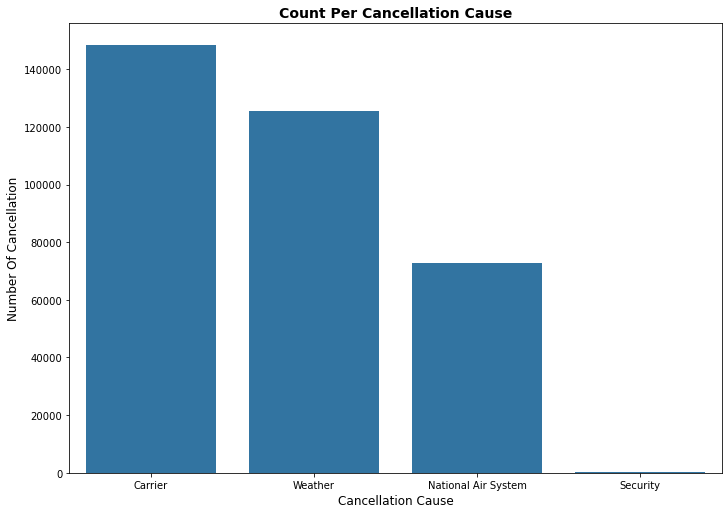

In [10]:
#Selecting the color palette
default_color = sns.color_palette()[0]

#set the size of the plot 
plt.figure(figsize=[11.69, 8.27])

g=sns.countplot(data=df_can, x='CancellationCode', color =default_color,order=['A','B','C','D']);
plt.xlabel('Cancellation Cause', fontsize='large')
plt.ylabel('Number Of Cancellation', fontsize='large')
plt.title('Count Per Cancellation Cause',fontsize=14, fontweight='bold')
g.set_xticklabels(['Carrier','Weather','National Air System','Security']);
plt.show()

- We Can see here based on the above plot most of cancellation came from Carrier cause.

### Which Carrier Cause More Cancellation ?

- We can see that the top carrier causing cancellation based on only carrier factor are (United Air Lines Inc. (UA) , American Eagle Airlines Inc.(MQ),American Airlines Inc.(AA))

In [11]:
# I will filter the data set based on carrier cause 
carrier_df = df_can[df_can['CancellationCode']=='A']

#then I will count the number of cancellation per carrier
carr_counts = carrier_df['UniqueCarrier'].value_counts()

carr_counts
# get the unique values in carrier in decreasing order 
carr_order = carr_counts.index

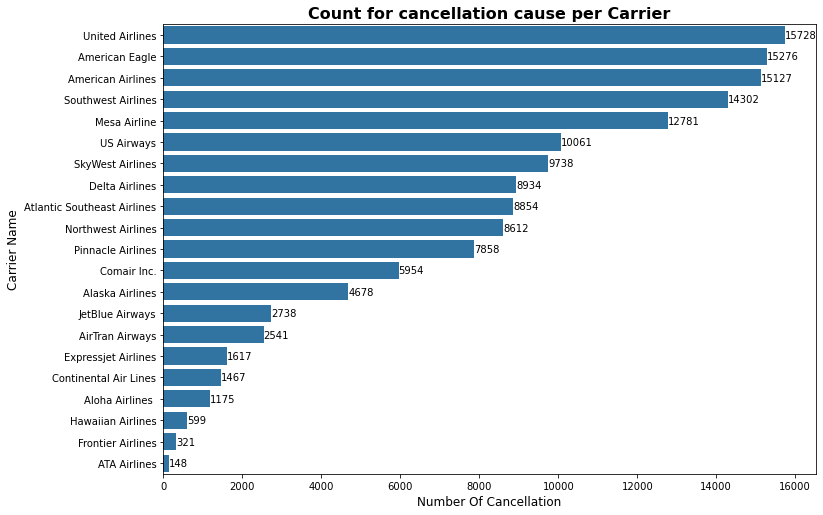

In [12]:
#let's plot the count bar 
base_color = sns.color_palette()[0]
plt.figure(figsize=(11.69, 8.27))

sns.countplot(data=carrier_df, y='UniqueCarrier', color=base_color, order=carr_order);

for i in range (carr_counts.shape[0]):
    count = carr_counts[i]
    pct_string = '{:0.0f}'.format(count)
    plt.text(count+1, i, pct_string, va='center')
    
plt.ylabel('Carrier Name', fontsize='large')
plt.xlabel('Number Of Cancellation', fontsize='large')
plt.title('Count for cancellation cause per Carrier', fontsize=16, fontweight='bold');

- We can see that the top carrier causing cancellation based on only carrier factor are (United Air Lines Inc. (UA) , American Eagle Airlines Inc.(MQ),American Airlines Inc.(AA))

### Distribution Of the Delay (Arrival and Departure) ?

The Distribution of the delay data takes from 5 to 300 min but we can see that the most common delay happen between 10 to 30 Min

- Since we are checking the delay here so we should exclude any negative values which indicate that there is no delay 
- Delayed flight will not be a cancelled so we will exclude the cancelled

In [13]:
# Filter out the null values for arrdelay and DepDelay and nigative values

df_dely = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]
df_dely = df_dely[df_dely['Cancelled'] == 0]

df_dely.shape

(5416069, 29)

In [14]:
df_dely.ArrDelay.isnull().sum()

0

In [15]:
np.log10(df_dely['ArrDelay'].describe())

count    6.733684
mean     1.609710
std      1.718720
min      0.000000
25%      1.000000
50%      1.361728
75%      1.707570
max      3.414639
Name: ArrDelay, dtype: float64

In [16]:
np.log10(df_dely['DepDelay'].describe())

count    6.733684
mean     1.585047
std      1.704768
min      0.000000
25%      0.954243
50%      1.322219
75%      1.681241
max      3.415140
Name: DepDelay, dtype: float64

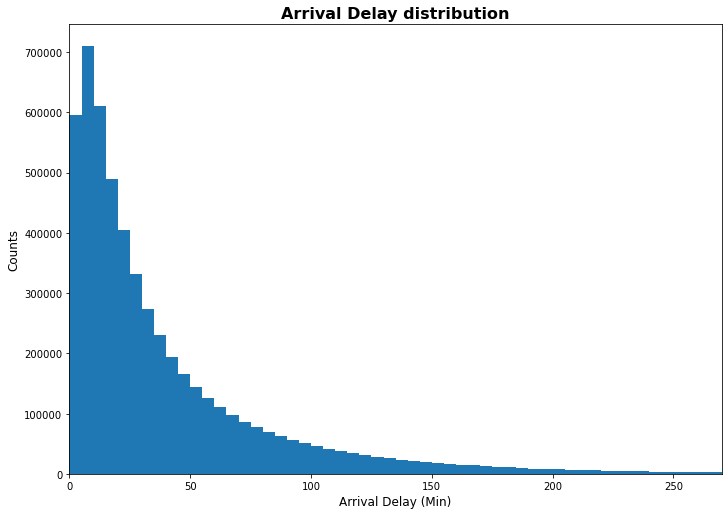

In [17]:
# start with a standard-scaled plot to check the Arrival Delay
binsize = 5
bins = np.arange(0, df_dely['ArrDelay'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])

plt.hist(data = df_dely, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (Min)', fontsize='large')
plt.ylabel('Counts', fontsize='large')
plt.title('Arrival Delay distribution', fontsize=16, fontweight='bold');
plt.xlim(0,270)
plt.show()

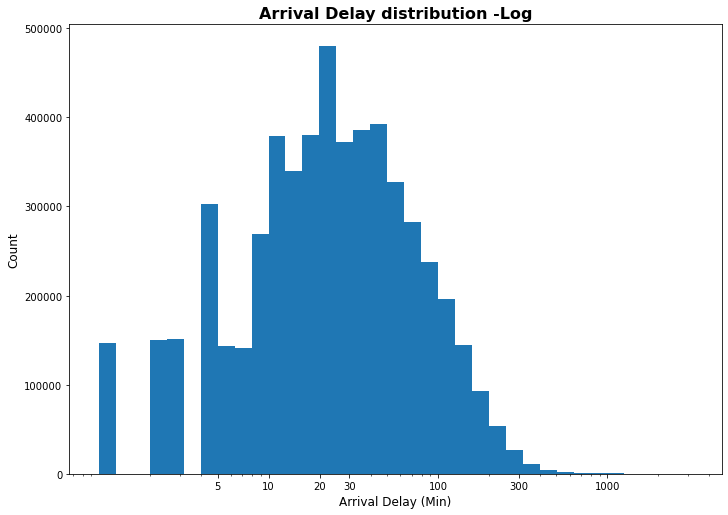

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.10
bins = 10 ** np.arange(0, np.log10(df_dely['ArrDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])

# Generate the x-ticks 
ticks = [5,10,20, 30, 100, 300, 1000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df_dely, x = 'ArrDelay', bins = bins)
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
plt.ylabel('Count', fontsize='large')
plt.xlabel('Arrival Delay (Min)', fontsize='large')
plt.title('Arrival Delay distribution -Log', fontsize=16, fontweight='bold');

plt.show()

Arrival Delay  has a long-tailed distribution The graph is skewed to the right. When plotted on a log-scale, the Arrdelay distribution looks roughly bimodal, with one peak at 5 mins, and a second peak between 10 and 30 min.

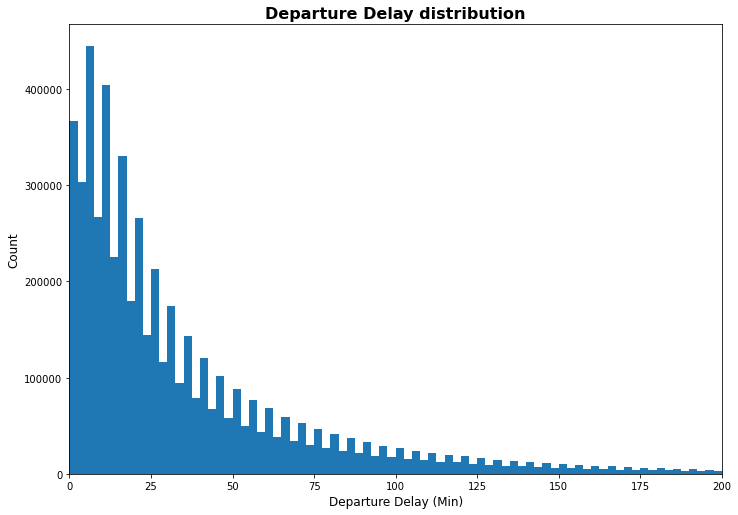

In [19]:
# Now with a standard-scaled plot to check the Departure Delay
binsize = 2.5
bins = np.arange(0, df_dely['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])

plt.hist(data = df_dely, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (Min)', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.title('Departure Delay distribution', fontsize=16, fontweight='bold');
plt.xlim(0,200)
plt.show()

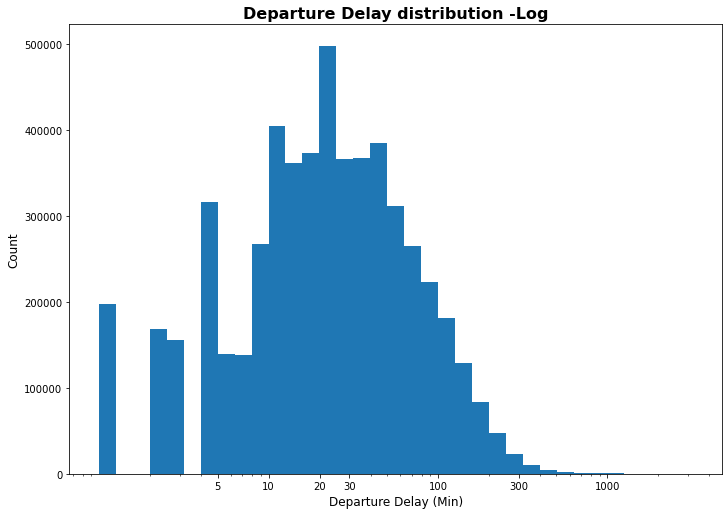

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.10
bins = 10 ** np.arange(0, np.log10(df_dely['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])

# Generate the x-ticks 
ticks = [5,10,20, 30, 100, 300, 1000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df_dely, x = 'DepDelay', bins = bins)
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
plt.ylabel('Count', fontsize='large')
plt.xlabel('Departure Delay (Min)', fontsize='large')
plt.title('Departure Delay distribution -Log', fontsize=16, fontweight='bold');

plt.show()

Departure Delay  has a long-tailed distribution The graph is skewed to the right. When plotted on a log-scale, the Depdelay distribution looks roughly bimodal, with one peak at 5 mins, and a second peak between 10 and 30 min.

### Which Destination Have The Highest Delay?

The highest destination delay are Marquette , Nantucket and Houghton between 21% to 23%

In [21]:
#Group by destinations codes and get sum of Cancellation for each destination
del_dest=df_dely.groupby('Dest').ArrDelay.mean().sort_values(ascending=False)
del_dest.head(10)

Dest
Marquette County Airport        69.721311
Nantucket Memorial              69.634043
Houghton County Memorial        66.300000
Newark Intl                     63.475353
Hickory Municipal               61.666667
Middle Georgia Regional         60.463878
Chicago O'Hare International    59.790747
Hilton Head                     59.361345
Capital                         59.260243
New Castle County               54.578275
Name: ArrDelay, dtype: float64

In [22]:
# I decided  to Plot a bar chart having the proportions, instead of the actual count.

n_del = del_dest.value_counts().sum()

# Return the highest frequency in the `dest` column
max_del = del_dest[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_del / n_del
print(max_prop)

0.22636789440068128


In [23]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)

# Use a list comprehension to create tick_names that we will apply to the tick labels.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

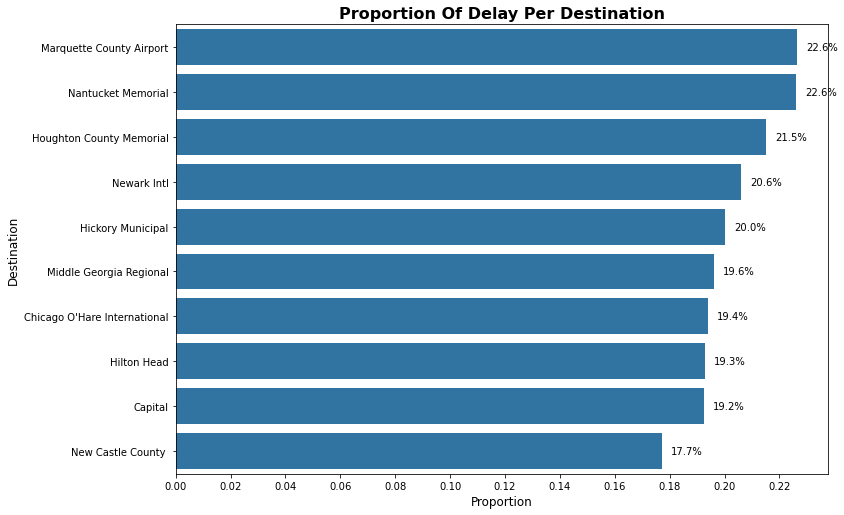

In [24]:
#let's plot the bar plot for only the highest 10 values 
base_color = sns.color_palette()[0]

plt.figure(figsize=(11.69, 8.27))

sns.barplot(x= del_dest.head(10).values, y=del_dest.head(10).index,color=base_color);

for i in range (del_dest.head(10).shape[0]):
    count = del_dest.values[i]
    pct_string = '{:0.1f}%'.format(100*count/n_del)
    plt.text(count+1, i, pct_string, va='center')

plt.xticks(tick_props * n_del, tick_names)
plt.xlabel('Proportion', fontsize='large');
plt.ylabel('Destination', fontsize='large')
plt.title('Proportion Of Delay Per Destination', fontsize=16, fontweight='bold');

- The highest destination delay are Marquette , Nantucket and Houghton between 21% to 23%

### Summary

- Started by looking into the cause of cancellation we can see that most of the cancellation were because of Carrier then Weather
- By investigating more into carrier cause we can see that (United Air Lines Inc. (UA), American Eagle Airlines Inc.(MQ), American Airlines Inc.(AA)) have the most cancellation 
- Then by looking into the delay distribution of both arrival and departure after excluding the negative values (early arrival or departure) we can see that the distribution has a long tail and the graph is skewed to the right so we plot it on a log scale we have found that in both graphs we have a peek at 5 Min and another peak between 10 to 30
- Finally, we checked the destination with the highest delay we can see that Marquette, Nantucket, and Houghton between 21% to 23%

## Bivariate Exploration

### what is the relation between arrival and departure delay?

In [25]:
df_dely.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

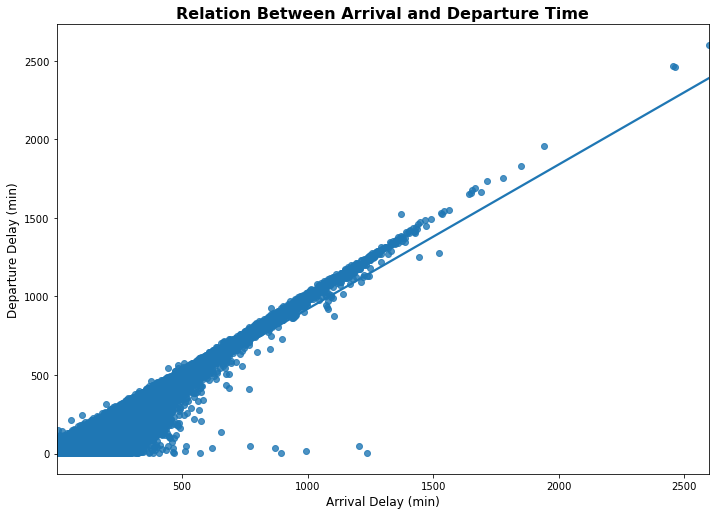

In [26]:
# correlation plot
plt.figure(figsize = [11.69, 8.27])

# Scatter plot
sns.regplot(data = df_dely, x = 'ArrDelay', y = 'DepDelay',ci = None ,);

plt.ylabel('Departure Delay (min)', fontsize='large');
plt.xlabel('Arrival Delay (min)',  fontsize='large');
plt.title('Relation Between Arrival and Departure Time', fontsize=16, fontweight='bold');

The regression line in the scatter plot showing a positive correlation between the arrival and departure delay 

### Cancellation Per Month for Every Cause Factor 

It appears that most of Weather case cancellation happen in Feb and Dec and the most of carrier cancellation happen in the begining of the year, Most of security delay happen in Feb

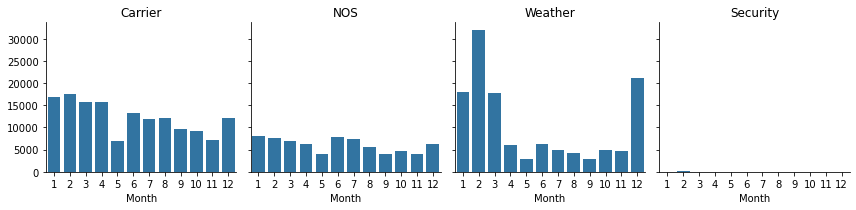

In [27]:
# Convert the "Month" column from a plain object type into an ordered categorical type
months_order =[1,2,3,4,5,6,7,8,9,10,11,12]

# plot 
g=sns.FacetGrid(data=df_can, col='CancellationCode')
g.map(sns.countplot,'Month',order=months_order)

axes = g.axes.flatten()
axes[0].set_title("Carrier")
axes[2].set_title("Weather")
axes[1].set_title("NOS")
axes[3].set_title("Security");


It appears that most of Weather case cancellation happen in Feb and Dec and the most of carrier cancellation happen in the begining of the year, Most of security delay happen in Feb

### The Mean Arrival Delay and Departure Delay Per Month

We can see that Most of the highest delay happen in Jun,July and Dec

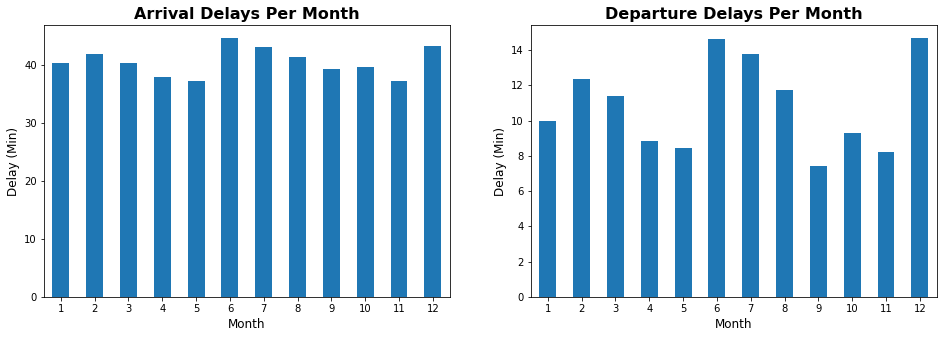

In [28]:
# Arrival and departure delays per month of the year
plt.figure(figsize=(16, 5)).subplots_adjust(hspace = 0.5)

plt.subplot(1, 2 ,1)
ax1 = df_dely.groupby('Month').ArrDelay.mean().plot.bar().set_title('Arrival delays by month')
plt.title('Arrival Delays Per Month', fontsize=16, fontweight='bold')
plt.ylabel('Delay (Min)', fontsize='large')
plt.xlabel('Month', fontsize='large')
plt.xticks(rotation=0);

plt.subplot(1, 2 ,2)
df.groupby('Month').DepDelay.mean().plot.bar()
plt.title('Departure Delays Per Month', fontsize=16, fontweight='bold')
plt.ylabel('Delay (Min)', fontsize='large')
plt.xlabel('Month', fontsize='large')
plt.xticks(rotation=0);

plt.show()

Most of the highest delay happen in Jun,July and Dec

In [29]:
# checking any other interested correlation 

df1 = df[['DepTime','ArrTime','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay','Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]


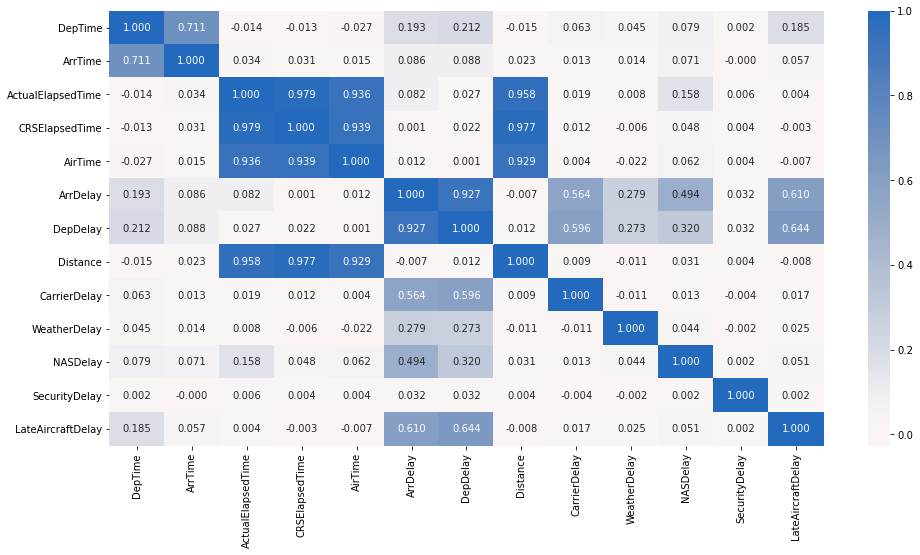

In [30]:
# correlation plot
plt.figure(figsize = [16, 8])
sns.heatmap(df1.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We can see that from the hitmap the distance correlated with (Airtime, Actual Elapsed Time and Estimated Elapsed Time) which make sense also we can see how Arrival dealy and Depature delay correlated with the 5 factories of study which we will stude in multivariate later

## Multivariate Exploration

### Which Factor Cause More Delay Per Month ?

Most of the delay every month because of Late Aircraft Delay , Also we can see that there are a rare delay because of security

In [31]:
df_dely.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [32]:
# I will create data by useing only the mean values of delay causes
df2 = df_dely[['Month','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].groupby(['Month']).mean().reset_index()
df2

,Month,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,13.003110,2.681915,10.520580,0.069096,16.684484
1,2,13.257067,3.044135,10.299413,0.095752,17.943747
2,3,12.934857,2.261619,10.287993,0.087947,17.402110
3,4,12.282975,1.867521,9.980341,0.097971,15.974358
4,5,10.175037,1.982511,8.610553,0.054243,13.781509
5,6,11.934891,3.092158,10.110267,0.070801,17.016458
6,7,12.111765,2.714997,8.991445,0.075007,16.822354
7,8,11.773028,2.324518,8.751013,0.191476,15.805325
8,9,11.446699,2.107344,9.316075,0.079658,13.713805
9,10,10.657470,1.941287,10.135601,0.061437,14.292580


In [33]:
# create a type and value colulms 
df2 = df2.melt(id_vars=['Month'], 
        var_name="DelayType", 
        value_name="Value")

Text(0.5, 0, 'Month')

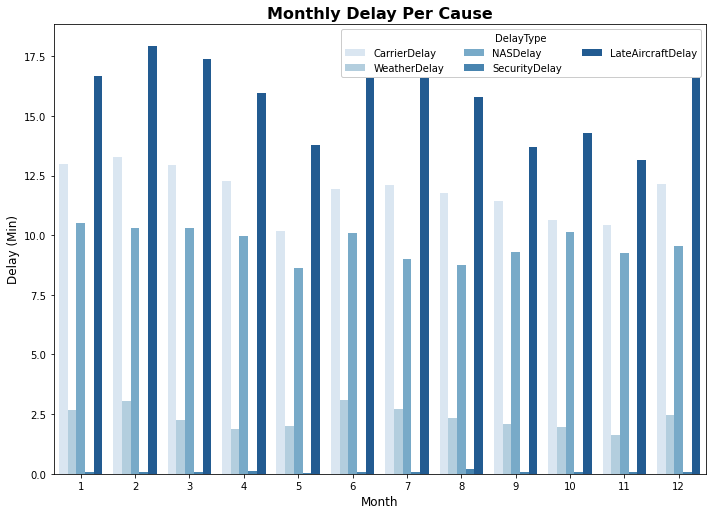

In [34]:
#Plot the bar graph
plt.figure(figsize=(11.69, 8.27))
ax = sns.barplot(data = df2, x = 'Month', y = 'Value', hue= 'DelayType',palette = 'Blues');
ax.legend(loc ='upper right', ncol = 3, framealpha = 1, title = 'DelayType')
plt.title('Monthly Delay Per Cause', fontsize=16, fontweight='bold')
plt.ylabel('Delay (Min)', fontsize='large')
plt.xlabel('Month', fontsize='large')

Most of the delay every month because of Late Aircraft Delay , Also we can see that there are a rare delay because of security

### Which Carrier Has More Delay at any Month?

From the graph , we can see the delay happen because of carrier per each carrier for every month , we can see that Hawaiian airlines get the highest delay at October ,also we can see that Atlantic Southeast airlines and Mesa airlines have highest delay from 2006 to 2008

Text(0.5, 53.42999999999999, 'Month')

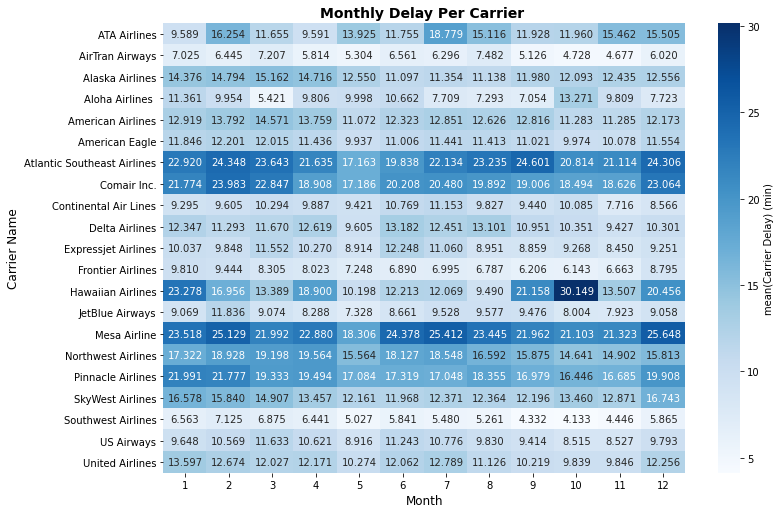

In [35]:
# build the data frame 
df3 = df_dely[['Month','UniqueCarrier', 'CarrierDelay']].groupby(['Month','UniqueCarrier']).mean('CarrierDelay')
df3 = df3.reset_index()
df3 = df3.pivot(index = 'UniqueCarrier', columns = 'Month',values = 'CarrierDelay')
# plot
plt.figure(figsize=(11.69, 8.27))
sns.heatmap(df3, annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(Carrier Delay) (min)'},cmap="Blues")
plt.title('Monthly Delay Per Carrier ',fontsize=14, fontweight='bold')

plt.ylabel('Carrier Name', fontsize='large')
plt.xlabel('Month', fontsize='large')


From the graph above, we can see the delay happen because of carrier per each carrier for every month , we can see that Hawaiian airlines get the highest delay at October ,also we can see that Atlantic Southeast airlines was getting alot of delay all over the year 